# Demographic Clustering Comparison Analysis

We run a clustering model on some subset of the data and measure the similarity of the produced clusterings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 6]

%matplotlib inline

In [2]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')

## Setup Best Model & Hyperparameters

In [3]:
from sklearn.cluster import AgglomerativeClustering

# See Model Selection.ipynb for why we chose these params.
cluster_model_params = {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 5}
cluster_model = AgglomerativeClustering()
cluster_model.set_params(**cluster_model_params)

AgglomerativeClustering(linkage='complete', n_clusters=5)

# Compare Clusters

## Compare by demographics

In [55]:
from util_comparisons import compute_similarity_matrix

demos = ['BLACK', 'WHITE', 'HISPANIC', 'CENSUS']
result_df = compute_similarity_matrix(data, demos, [], create_training_data_race, cluster_model)

In [56]:
result_df

col,BLACK,CENSUS,HISPANIC,WHITE
row,,,,
BLACK,1.000000,0.440315,0.642794,0.675355
CENSUS,0.440315,1.000000,0.649721,0.597085
HISPANIC,0.642794,0.649721,1.000000,0.715357
WHITE,0.675355,0.597085,0.715357,1.000000


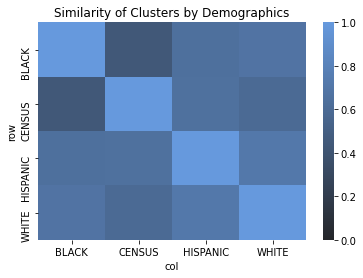

In [58]:
sns.heatmap(result_df, cmap=sns.dark_palette("#69d", as_cmap=True), vmin=0, vmax=1)
plt.title('Similarity of Clusters by Demographics')
plt.savefig('../report/figures/demo_comparison/similarity_by_demo.png', dpi=300)